In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import spectroscopy data
X = pd.read_csv('/content/drive/My Drive/BDQM_VIP/RamanSpectra.csv', header=None).to_numpy()            #Spectra
y = pd.read_csv('/content/drive/My Drive/BDQM_VIP/RamanConcentrations.csv', header=None).to_numpy()     #Concentrations
S = pd.read_csv('/content/drive/My Drive/BDQM_VIP/RamanShifts.csv', header=None).to_numpy()             #Raman Shifts
Species = ['Kyanite','Wollastonite','Olivine','Silica','Zircon'] # different insoluble GFCs for raman spec.


In [4]:
X

array([[ 3010.85522461,  3009.37231445,  3004.17358398, ...,
         6698.14453125,  6703.19042969,  6709.94921875],
       [ 3419.99682617,  3437.38305664,  3454.46362305, ...,
         6080.75390625,  6081.29541016,  6090.33447266],
       [ 6167.03271484,  6174.61083984,  6182.71777344, ...,
        12224.12695312, 12219.92773438, 12223.38867188],
       ...,
       [10075.296875  , 10126.30371094, 10174.89550781, ...,
        19113.61132812, 19098.78125   , 19091.16210938],
       [17954.1953125 , 17991.1328125 , 18033.67382812, ...,
        28507.82617188, 28455.74804688, 28397.19140625],
       [19275.12109375, 19316.15039062, 19374.52148438, ...,
        28427.82226562, 28338.61328125, 28241.74804688]])

In [8]:
y

array([[  5.86021043,   5.9225531 ,   0.        ,  51.99378193,
          0.        ],
       [  6.37757871,  20.35397462,  11.39822578,  17.97934424,
          9.29498174],
       [  7.08647908,  22.61642261,   0.        ,  25.33039332,
         10.32816633],
       [  7.3894823 ,   6.85206541,   4.36651227,  42.65746601,
          3.69474115],
       [  9.55537419,   0.        ,   0.        ,  31.33687932,
          8.13097058],
       [ 12.24990999,  26.31521125,  11.41988857,  70.00729663,
          9.31264722],
       [ 13.12399708,   8.5707736 ,   4.48626431,  32.74303352,
          4.21842763],
       [ 14.32968074,  29.00163488,   4.36651227,  67.46498382,
         13.80971121],
       [ 18.38198473,   0.        ,  10.87385012,  27.24935061,
          0.        ],
       [ 18.55883661,   0.        ,  10.97846673,  25.02829022,
          5.16249328],
       [ 18.97309107,  14.482092  ,   4.48626431,  84.63818664,
          4.21842763],
       [ 19.39341515,  19.39341515,   0.   

In [9]:
# check dimensions
X.shape, y.shape, S.shape

((66, 1601), (66, 5), (1601, 1))

In [33]:
y[:,0]

array([ 5.86021043,  6.37757871,  7.08647908,  7.3894823 ,  9.55537419,
       12.24990999, 13.12399708, 14.32968074, 18.38198473, 18.55883661,
       18.97309107, 19.39341515, 21.79367853, 24.81633598, 27.71370414,
       28.18867172, 28.9128307 , 29.12359399, 31.18753711, 31.64720227,
       34.03776572, 35.66282176, 36.76396947, 37.09913293, 38.7350349 ,
       41.11221626, 41.11931453, 43.10854372, 44.34491496, 44.5841289 ,
       46.06287703, 47.44034612, 47.86459213, 50.35449507, 54.03529993,
       54.22310245, 54.23282001, 54.5126664 , 54.93691242, 55.42825105,
       55.60869584, 56.15158007, 56.731428  , 60.89470674, 61.78182564,
       62.1113503 , 63.12112755, 64.6865711 , 65.8246374 , 66.88453113,
       68.41445824, 68.42078307, 70.61786546, 70.6346255 , 71.75889138,
       72.77474025, 73.56423883, 73.76702579, 73.8177963 , 80.24464358,
       81.41331509, 85.12346284, 87.20960833, 92.75497535, 96.47593396,
       99.60900831])

Text(0.5, 1.0, 'Raman Spectroscopy')

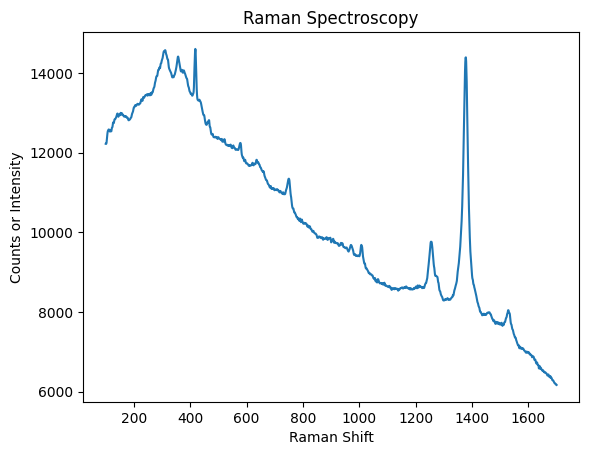

In [10]:
# plot of raman spectrum without filter
plt.plot(S, X[2, :])
plt.xlabel("Raman Shift")
plt.ylabel("Counts or Intensity")
plt.title("Raman Spectroscopy")

Text(0.5, 1.0, 'Raman Spectroscopy')

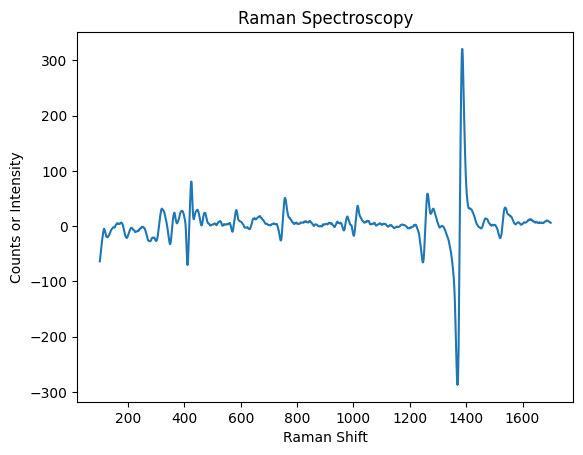

In [11]:
# plot of raman spectrum with SG filter
plt.plot(S, signal.savgol_filter(X[2, :], window_length = 19, polyorder = 2, deriv = 1))
plt.xlabel("Raman Shift")
plt.ylabel("Counts or Intensity")
plt.title("Raman Spectroscopy")

In [12]:
# test train split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = X_train  # training spectra data
output_data_np = y_train[:, 1]   # training concentration data for one compound

# convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1601, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item()}")

# Step 7: Testing and evaluation
test_input_np = X_test  # test input
# convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# 'predictions' now contains the predicted intensities
print(predictions)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/100] Loss: 1099405440.0
Epoch [2/100] Loss: 38518052.0
Epoch [3/100] Loss: 43467212.0
Epoch [4/100] Loss: 51947.81640625
Epoch [5/100] Loss: 17238638.0
Epoch [6/100] Loss: 9077317.0
Epoch [7/100] Loss: 457475.71875
Epoch [8/100] Loss: 9945708.0
Epoch [9/100] Loss: 6994222.0
Epoch [10/100] Loss: 34746.87890625
Epoch [11/100] Loss: 5393558.5
Epoch [12/100] Loss: 4191419.5
Epoch [13/100] Loss: 1700.326904296875
Epoch [14/100] Loss: 1886541.25
Epoch [15/100] Loss: 2379068.5
Epoch [16/100] Loss: 48095.6015625
Epoch [17/100] Loss: 1304604.0
Epoch [18/100] Loss: 1076187.5
Epoch [19/100] Loss: 27715.232421875
Epoch [20/100] Loss: 615452.1875
Epoch [21/100] Loss: 544598.1875
Epoch [22/100] Loss: 31973.48046875
Epoch [23/100] Loss: 295207.28125
Epoch [24/100] Loss: 320641.125
Epoch [25/100] Loss: 6243.54736328125
Epoch [26/100] Loss: 176786.203125
Epoch [27/100] Loss: 226684.65625
Epoch [28/100] Loss: 1480.7166748046875
Epoch [29/100] Loss: 138743.5
Epoch [30/100] Loss: 91515.140625
Epo

In [ ]:
print(y_test[:,1].reshape(len(y_test), 1))

[[86.45707527]
 [ 0.        ]
 [41.9646501 ]
 [22.61642261]
 [41.9646501 ]
 [98.7156423 ]
 [51.536643  ]
 [42.3471274 ]
 [88.61187665]
 [28.76654252]
 [28.76654252]
 [ 0.        ]
 [88.61187665]
 [45.71250353]]


In [ ]:
mean_squared_error(y_test[:, 1], np.array(predictions))

410.69496271606334

In [ ]:
# same neural network but with fliter added to the data

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train, window_length = 19, polyorder = 2, deriv = 1)  # training spectra data with SG filter
output_data_np = y_train[:, 1]   # training concentration data for one compound

# convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1601, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item()}")

# Step 7: Testing and evaluation
test_input_np = signal.savgol_filter(X_test, window_length = 19, polyorder = 2, deriv = 1)  # Replace with your actual test input
# convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# 'predictions' now contains the predicted intensities
print(predictions)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/100] Loss: 1310.23828125
Epoch [2/100] Loss: 1112.8671875
Epoch [3/100] Loss: 1098.5838623046875
Epoch [4/100] Loss: 1259.10107421875
Epoch [5/100] Loss: 763.2349853515625
Epoch [6/100] Loss: 919.6796264648438
Epoch [7/100] Loss: 1155.798095703125
Epoch [8/100] Loss: 953.9915771484375
Epoch [9/100] Loss: 497.3034362792969
Epoch [10/100] Loss: 1197.6259765625
Epoch [11/100] Loss: 693.3267822265625
Epoch [12/100] Loss: 939.1989135742188
Epoch [13/100] Loss: 801.9165649414062
Epoch [14/100] Loss: 534.1832275390625
Epoch [15/100] Loss: 692.9640502929688
Epoch [16/100] Loss: 765.4349365234375
Epoch [17/100] Loss: 1025.6619873046875
Epoch [18/100] Loss: 920.5670166015625
Epoch [19/100] Loss: 760.3063354492188
Epoch [20/100] Loss: 1026.04541015625
Epoch [21/100] Loss: 770.3943481445312
Epoch [22/100] Loss: 825.96630859375
Epoch [23/100] Loss: 813.74951171875
Epoch [24/100] Loss: 677.5346069335938
Epoch [25/100] Loss: 753.67919921875
Epoch [26/100] Loss: 925.6984252929688
Epoch [27/10

In [ ]:
print(y_test[:,1].reshape(len(y_test), 1))

[[86.45707527]
 [ 0.        ]
 [41.9646501 ]
 [22.61642261]
 [41.9646501 ]
 [98.7156423 ]
 [51.536643  ]
 [42.3471274 ]
 [88.61187665]
 [28.76654252]
 [28.76654252]
 [ 0.        ]
 [88.61187665]
 [45.71250353]]


In [ ]:
mean_squared_error(y_test[:, 1], np.array(predictions))

941.5511599571106

Same NN code with scaling


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
output_data_np = y_train[:, 2]  # training concentration data for one compound

# Standard scaling for input data
input_scaler = StandardScaler()
input_data_np = input_scaler.fit_transform(input_data_np)

# Standard scaling for output data
output_scaler = StandardScaler()
output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

# Convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1601, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = nn.LeakyReLU(0.2)(self.fc1(x))
        x = nn.LeakyReLU(0.2)(self.fc2(x))
        x = nn.LeakyReLU(0.2)(self.fc3(x))
        x = self.fc4(x)
        return x

model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 200
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item()}")

# Step 7: Testing and evaluation
test_input_np = signal.savgol_filter(X_test, window_length=19, polyorder=2, deriv=1)  # Replace with your actual test input

# Standard scaling for test input
test_input_np = input_scaler.transform(test_input_np)

# Convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# Inverse transform the scaled predictions to get the actual values
predictions = output_scaler.inverse_transform(predictions)

# 'predictions' now contains the predicted intensities
print(predictions)


Epoch [1/200] Loss: 0.8985568284988403
Epoch [2/200] Loss: 0.29917842149734497
Epoch [3/200] Loss: 0.3683182895183563
Epoch [4/200] Loss: 0.39524945616722107
Epoch [5/200] Loss: 0.362881600856781
Epoch [6/200] Loss: 0.23326578736305237
Epoch [7/200] Loss: 0.09318987280130386
Epoch [8/200] Loss: 0.11018668115139008
Epoch [9/200] Loss: 0.08242308348417282
Epoch [10/200] Loss: 0.0937855914235115
Epoch [11/200] Loss: 0.05686783045530319
Epoch [12/200] Loss: 0.03011493757367134
Epoch [13/200] Loss: 0.07202653586864471
Epoch [14/200] Loss: 0.01850994862616062
Epoch [15/200] Loss: 0.042683470994234085
Epoch [16/200] Loss: 0.01970432884991169
Epoch [17/200] Loss: 0.015338018536567688
Epoch [18/200] Loss: 0.009134817868471146
Epoch [19/200] Loss: 0.017617683857679367
Epoch [20/200] Loss: 0.020586054772138596
Epoch [21/200] Loss: 0.0059768809005618095
Epoch [22/200] Loss: 0.017185460776090622
Epoch [23/200] Loss: 0.007836459204554558
Epoch [24/200] Loss: 0.010055050253868103
Epoch [25/200] Loss:

In [15]:
print(y_test[:,2].reshape(len(y_test), 1))

[[45.30313463]
 [32.33753489]
 [11.08622425]
 [ 0.        ]
 [11.08622425]
 [15.70958251]
 [ 4.36651227]
 [ 0.        ]
 [22.36613845]
 [37.54552829]
 [37.54552829]
 [21.59598759]
 [22.36613845]
 [22.48617445]]


In [17]:
mean_squared_error(y_test[:, 2], np.array(predictions))

50.919287722931195

In [ ]:
print(y_train)

[[ 43.10854372  20.24864123  33.08693934  72.38500097   9.2468795 ]
 [ 81.41331509  16.96983774  41.67119232 142.03264183  18.67217124]
 [ 70.61786546  63.50971093  10.90994409 158.39554513  41.72997449]
 [  7.3894823    6.85206541   4.36651227  42.65746601   3.69474115]
 [ 54.23282001  50.91104935   4.4826779   76.74780524   4.21505533]
 [ 38.7350349   47.71970859  20.33297692 198.01245586  17.27786329]
 [ 18.97309107  14.482092     4.48626431  84.63818664   4.21842763]
 [ 80.24464358  57.91103639  19.8651209  147.69533324   7.98955815]
 [ 31.64720227  45.71250353  11.41988857  91.24869768   9.31264722]
 [ 54.03529993  51.536643    15.2347388  114.62672736  18.92036535]
 [ 92.75497535  18.98794955  32.33753489 162.01671524  21.35798152]
 [ 29.12359399  19.39341515   0.          53.14730705   8.2797174 ]
 [ 73.8177963   82.0554197   19.62707803 171.46698314  33.15534058]
 [ 73.56423883  99.78656141  15.88000831 171.93841236  23.81983052]
 [ 68.42078307   8.48491887  37.22986759 109.617

In [19]:
# The previous NN with 10 fold cross validation for concentration of compound 3

# test train split:
# We don't need this for cross-validation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn
from scipy import signal

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1601, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = nn.LeakyReLU(0.2)(self.fc1(x))
        x = nn.LeakyReLU(0.2)(self.fc2(x))
        x = nn.LeakyReLU(0.2)(self.fc3(x))
        x = self.fc4(x)
        return x

# Step 8: Cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

mse_errors = []
best_mse = float('inf')
best_train_idx = None
best_test_idx = None

for train_idx, test_idx in kf.split(X):
    # Split data
    X_train_cv, X_test_cv = X[train_idx], X[test_idx]
    y_train_cv, y_test_cv = y[train_idx], y[test_idx]

    # 'input_data' and 'output_data' into the neural net
    input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
    output_data_np = y_train_cv[:, 2]  # training concentration data for one compound

    # Standard scaling for input data
    input_scaler = StandardScaler()
    input_data_np = input_scaler.fit_transform(input_data_np)

    # Standard scaling for output data
    output_scaler = StandardScaler()
    output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

    # Convert to torch tensor
    input_data = torch.tensor(input_data_np, dtype=torch.float32)
    output_data = torch.tensor(output_data_np, dtype=torch.float32)

    # Step 3: Create DataLoader
    batch_size = 32
    dataset = CustomDataset(input_data, output_data)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Step 4: Initialize the neural network architecture
    model = MyModel()

    # Step 5: Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Step 6: Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        for inputs, targets in data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Step 7: Testing and evaluation
    test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

    # Standard scaling for test input
    test_input_np = input_scaler.transform(test_input_np)

    # Convert to tensor
    test_input = torch.tensor(test_input_np, dtype=torch.float32)

    with torch.no_grad():
        predictions = model(test_input)

    # Inverse transform the scaled predictions to get the actual values
    predictions = output_scaler.inverse_transform(predictions)

    mse = mean_squared_error(y_test_cv[:, 2], predictions)
    mse_errors.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_train_idx = train_idx
        best_test_idx = test_idx

# Print MSE for each fold
for i, mse in enumerate(mse_errors):
    print(f"Fold {i+1}: MSE = {mse}")

# Print training and test set with lowest MSE
print(f"Best MSE: {best_mse}")
print(f"Best training set indices: {best_train_idx}")
print(f"Best test set indices: {best_test_idx}")


# running the NN on the best split

X_train_cv, X_test_cv = X[best_train_idx], X[best_test_idx]
y_train_cv, y_test_cv = y[best_train_idx], y[best_test_idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
output_data_np = y_train_cv[:, 2]  # training concentration data for one compound

# Standard scaling for input data
input_scaler = StandardScaler()
input_data_np = input_scaler.fit_transform(input_data_np)

# Standard scaling for output data
output_scaler = StandardScaler()
output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

# Convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Initialize the neural network architecture
model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Step 7: Testing and evaluation
test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

# Standard scaling for test input
test_input_np = input_scaler.transform(test_input_np)

# Convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# Inverse transform the scaled predictions to get the actual values
predictions = output_scaler.inverse_transform(predictions)

mse = mean_squared_error(y_test_cv[:, 2], predictions)
print(mse)
print(predictions)
print(y_test_cv[:,2].reshape(len(y_test_cv), 1))

Fold 1: MSE = 34.19513900198031
Fold 2: MSE = 29.660245353842917
Fold 3: MSE = 26.175951758416296
Fold 4: MSE = 19.373540639515486
Fold 5: MSE = 11.148511305212832
Fold 6: MSE = 25.916789429954896
Fold 7: MSE = 28.13833825335131
Fold 8: MSE = 22.41413224919493
Fold 9: MSE = 28.025726474239338
Fold 10: MSE = 10.976775397265824
Best MSE: 10.976775397265824
Best training set indices: [ 0  1  2  3  4  6  7 10 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65]
Best test set indices: [ 5  8  9 11 12 37]
14.228082834897096
[[10.9597478 ]
 [19.37524847]
 [10.4752792 ]
 [-0.80676395]
 [ 2.91349745]
 [12.82821612]]
[[11.41988857]
 [10.87385012]
 [10.97846673]
 [ 0.        ]
 [ 0.        ]
 [10.95993869]]


In [20]:
# The previous NN with 10 fold cross validation for concentration of compound 2

# test train split:
# We don't need this for cross-validation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn
from scipy import signal

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1601, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = nn.LeakyReLU(0.2)(self.fc1(x))
        x = nn.LeakyReLU(0.2)(self.fc2(x))
        x = nn.LeakyReLU(0.2)(self.fc3(x))
        x = self.fc4(x)
        return x

# Step 8: Cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

mse_errors = []
best_mse = float('inf')
best_train_idx = None
best_test_idx = None

for train_idx, test_idx in kf.split(X):
    # Split data
    X_train_cv, X_test_cv = X[train_idx], X[test_idx]
    y_train_cv, y_test_cv = y[train_idx], y[test_idx]

    # 'input_data' and 'output_data' into the neural net
    input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
    output_data_np = y_train_cv[:, 1]  # training concentration data for one compound

    # Standard scaling for input data
    input_scaler = StandardScaler()
    input_data_np = input_scaler.fit_transform(input_data_np)

    # Standard scaling for output data
    output_scaler = StandardScaler()
    output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

    # Convert to torch tensor
    input_data = torch.tensor(input_data_np, dtype=torch.float32)
    output_data = torch.tensor(output_data_np, dtype=torch.float32)

    # Step 3: Create DataLoader
    batch_size = 32
    dataset = CustomDataset(input_data, output_data)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Step 4: Initialize the neural network architecture
    model = MyModel()

    # Step 5: Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Step 6: Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        for inputs, targets in data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Step 7: Testing and evaluation
    test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

    # Standard scaling for test input
    test_input_np = input_scaler.transform(test_input_np)

    # Convert to tensor
    test_input = torch.tensor(test_input_np, dtype=torch.float32)

    with torch.no_grad():
        predictions = model(test_input)

    # Inverse transform the scaled predictions to get the actual values
    predictions = output_scaler.inverse_transform(predictions)

    mse = mean_squared_error(y_test_cv[:, 1], predictions)
    mse_errors.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_train_idx = train_idx
        best_test_idx = test_idx

# Print MSE for each fold
for i, mse in enumerate(mse_errors):
    print(f"Fold {i+1}: MSE = {mse}")

# Print training and test set with lowest MSE
print(f"Best MSE: {best_mse}")
print(f"Best training set indices: {best_train_idx}")
print(f"Best test set indices: {best_test_idx}")


# running the NN on the best split

X_train_cv, X_test_cv = X[best_train_idx], X[best_test_idx]
y_train_cv, y_test_cv = y[best_train_idx], y[best_test_idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
output_data_np = y_train_cv[:, 1]  # training concentration data for one compound

# Standard scaling for input data
input_scaler = StandardScaler()
input_data_np = input_scaler.fit_transform(input_data_np)

# Standard scaling for output data
output_scaler = StandardScaler()
output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

# Convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Initialize the neural network architecture
model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Step 7: Testing and evaluation
test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

# Standard scaling for test input
test_input_np = input_scaler.transform(test_input_np)

# Convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# Inverse transform the scaled predictions to get the actual values
predictions = output_scaler.inverse_transform(predictions)

mse = mean_squared_error(y_test_cv[:, 1], predictions)
print(mse)
print(predictions)
print(y_test_cv[:,1].reshape(len(y_test_cv), 1))


Fold 1: MSE = 83.8845006540398
Fold 2: MSE = 43.09963569259528
Fold 3: MSE = 58.2285952584891
Fold 4: MSE = 72.86351560714323
Fold 5: MSE = 26.36074064612262
Fold 6: MSE = 32.299329460994116
Fold 7: MSE = 56.75370820886434
Fold 8: MSE = 44.315029781032344
Fold 9: MSE = 53.051270803311986
Fold 10: MSE = 128.3440034956913
Best MSE: 26.36074064612262
Best training set indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 33 34 36 37 38 39 40 41 42 43 45 46 47 48 49 50 52
 53 55 56 57 58 59 60 61 63 64 65]
Best test set indices: [13 31 35 44 51 54 62]
24.147058434595927
[[21.01176433]
 [42.43117009]
 [75.90985148]
 [59.10981075]
 [11.54946238]
 [53.75113823]
 [19.59928446]]
[[20.38749908]
 [45.67242784]
 [80.44542502]
 [57.91103639]
 [ 8.48491887]
 [64.53588505]
 [22.82779368]]


In [22]:
# The previous NN with 10 fold cross validation for concentration of compound 4

# test train split:
# We don't need this for cross-validation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn
from scipy import signal
import numpy as np

torch.manual_seed(0)
np.random.seed(0)

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1601, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = nn.LeakyReLU(0.2)(self.fc1(x))
        x = nn.LeakyReLU(0.2)(self.fc2(x))
        x = nn.LeakyReLU(0.2)(self.fc3(x))
        x = self.fc4(x)
        return x

# Step 8: Cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

mse_errors = []
best_mse = float('inf')
best_train_idx = None
best_test_idx = None

for train_idx, test_idx in kf.split(X):
    # Split data
    X_train_cv, X_test_cv = X[train_idx], X[test_idx]
    y_train_cv, y_test_cv = y[train_idx], y[test_idx]

    # 'input_data' and 'output_data' into the neural net
    input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
    output_data_np = y_train_cv[:, 3]  # training concentration data for one compound

    # Standard scaling for input data
    input_scaler = StandardScaler()
    input_data_np = input_scaler.fit_transform(input_data_np)

    # Standard scaling for output data
    output_scaler = StandardScaler()
    output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

    # Convert to torch tensor
    input_data = torch.tensor(input_data_np, dtype=torch.float32)
    output_data = torch.tensor(output_data_np, dtype=torch.float32)

    # Step 3: Create DataLoader
    batch_size = 32
    dataset = CustomDataset(input_data, output_data)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Step 4: Initialize the neural network architecture
    model = MyModel()

    # Step 5: Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Step 6: Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        for inputs, targets in data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Step 7: Testing and evaluation
    test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

    # Standard scaling for test input
    test_input_np = input_scaler.transform(test_input_np)

    # Convert to tensor
    test_input = torch.tensor(test_input_np, dtype=torch.float32)

    with torch.no_grad():
        predictions = model(test_input)

    # Inverse transform the scaled predictions to get the actual values
    predictions = output_scaler.inverse_transform(predictions)

    mse = mean_squared_error(y_test_cv[:, 3], predictions)
    mse_errors.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_train_idx = train_idx
        best_test_idx = test_idx

# Print MSE for each fold
for i, mse in enumerate(mse_errors):
    print(f"Fold {i+1}: MSE = {mse}")

# Print training and test set with lowest MSE
print(f"Best MSE: {best_mse}")
print(f"Best training set indices: {best_train_idx}")
print(f"Best test set indices: {best_test_idx}")


# running the NN on the best split

X_train_cv, X_test_cv = X[best_train_idx], X[best_test_idx]
y_train_cv, y_test_cv = y[best_train_idx], y[best_test_idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
output_data_np = y_train_cv[:, 3]  # training concentration data for one compound

# Standard scaling for input data
input_scaler = StandardScaler()
input_data_np = input_scaler.fit_transform(input_data_np)

# Standard scaling for output data
output_scaler = StandardScaler()
output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

# Convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Initialize the neural network architecture
model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Step 7: Testing and evaluation
test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

# Standard scaling for test input
test_input_np = input_scaler.transform(test_input_np)

# Convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# Inverse transform the scaled predictions to get the actual values
predictions = output_scaler.inverse_transform(predictions)

mse = mean_squared_error(y_test_cv[:, 3], predictions)
print(mse)
print(predictions)
print(y_test_cv[:,3].reshape(len(y_test_cv), 1))

Fold 1: MSE = 80.52116049900815
Fold 2: MSE = 203.48704605242574
Fold 3: MSE = 167.1327225010435
Fold 4: MSE = 232.48858676976306
Fold 5: MSE = 498.16080663639576
Fold 6: MSE = 471.7728415284928
Fold 7: MSE = 1443.7391546117303
Fold 8: MSE = 73.39313811248373
Fold 9: MSE = 340.82793807783986
Fold 10: MSE = 232.8251976582867
Best MSE: 73.39313811248373
Best training set indices: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48 49 51 52
 53 54 55 56 57 58 59 60 61 62 63 64]
Best test set indices: [ 6 20 25 45 50 65]
98.42099808359323
[[ 45.20366802]
 [ 89.08665629]
 [131.74305037]
 [157.32670303]
 [146.08083164]
 [155.4489942 ]]
[[ 32.74303352]
 [ 92.7607851 ]
 [118.04818277]
 [150.0291297 ]
 [146.16816624]
 [168.90067631]]


In [25]:
# The previous NN with 10 fold cross validation for concentration of compound 5

# test train split:
# We don't need this for cross-validation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn
from scipy import signal
import numpy as np

# set seeds for reproducibilty and other params for determistic process
torch.manual_seed(0)
np.random.seed(0)

torch.use_deterministic_algorithms(True)
torch.backends.cudnn.deterministic = True

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1601, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = nn.LeakyReLU(0.2)(self.fc1(x))
        x = nn.LeakyReLU(0.2)(self.fc2(x))
        x = nn.LeakyReLU(0.2)(self.fc3(x))
        x = self.fc4(x)
        return x

# Step 8: Cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

mse_errors = []
best_mse = float('inf')
best_train_idx = None
best_test_idx = None

for train_idx, test_idx in kf.split(X):
    # Split data
    X_train_cv, X_test_cv = X[train_idx], X[test_idx]
    y_train_cv, y_test_cv = y[train_idx], y[test_idx]

    # 'input_data' and 'output_data' into the neural net
    input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
    output_data_np = y_train_cv[:, 4]  # training concentration data for one compound  ################

    # Standard scaling for input data
    input_scaler = StandardScaler()
    input_data_np = input_scaler.fit_transform(input_data_np)

    # Standard scaling for output data
    output_scaler = StandardScaler()
    output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

    # Convert to torch tensor
    input_data = torch.tensor(input_data_np, dtype=torch.float32)
    output_data = torch.tensor(output_data_np, dtype=torch.float32)

    # Step 3: Create DataLoader
    batch_size = 32
    dataset = CustomDataset(input_data, output_data)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Step 4: Initialize the neural network architecture
    model = MyModel()

    # Step 5: Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Step 6: Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        for inputs, targets in data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Step 7: Testing and evaluation
    test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

    # Standard scaling for test input
    test_input_np = input_scaler.transform(test_input_np)

    # Convert to tensor
    test_input = torch.tensor(test_input_np, dtype=torch.float32)

    with torch.no_grad():
        predictions = model(test_input)

    # Inverse transform the scaled predictions to get the actual values
    predictions = output_scaler.inverse_transform(predictions)

    mse = mean_squared_error(y_test_cv[:, 4], predictions) ################
    mse_errors.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_train_idx = train_idx
        best_test_idx = test_idx

# Print MSE for each fold
for i, mse in enumerate(mse_errors):
    print(f"Fold {i+1}: MSE = {mse}")

# Print training and test set with lowest MSE
print(f"Best MSE: {best_mse}")
print(f"Best training set indices: {best_train_idx}")
print(f"Best test set indices: {best_test_idx}")


# running the NN on the best split

X_train_cv, X_test_cv = X[best_train_idx], X[best_test_idx]
y_train_cv, y_test_cv = y[best_train_idx], y[best_test_idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
output_data_np = y_train_cv[:, 4]  # training concentration data for one compound.       ################

# Standard scaling for input data
input_scaler = StandardScaler()
input_data_np = input_scaler.fit_transform(input_data_np)

# Standard scaling for output data
output_scaler = StandardScaler()
output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

# Convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Initialize the neural network architecture
model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Step 7: Testing and evaluation
test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

# Standard scaling for test input
test_input_np = input_scaler.transform(test_input_np)

# Convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# Inverse transform the scaled predictions to get the actual values
predictions = output_scaler.inverse_transform(predictions)

mse = mean_squared_error(y_test_cv[:, 4], predictions) ################
print(mse)
print(predictions)
print(y_test_cv[:,4].reshape(len(y_test_cv), 1)) ################

Fold 1: MSE = 12.298505141591416
Fold 2: MSE = 6.939499076124927
Fold 3: MSE = 7.708467866950296
Fold 4: MSE = 2.059611150873801
Fold 5: MSE = 9.161490466375042
Fold 6: MSE = 3.844452075497987
Fold 7: MSE = 2.3264732194009636
Fold 8: MSE = 3.2999914301169517
Fold 9: MSE = 4.415235227582507
Fold 10: MSE = 3.821955157929803
Best MSE: 2.059611150873801
Best training set indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 57 60 61 62 64 65]
Best test set indices: [17 19 34 56 58 59 63]
1.1726446218507809
[[ 7.96753205]
 [11.15773394]
 [19.84470174]
 [22.18856051]
 [32.29374224]
 [ 8.20674917]
 [21.99181466]]
[[ 8.2797174 ]
 [ 9.31264722]
 [18.92036535]
 [23.81983052]
 [33.15534058]
 [ 7.98955815]
 [21.35798152]]


In [27]:
# The previous NN with 10 fold cross validation for concentration of compound 1

# test train split:
# We don't need this for cross-validation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn
from scipy import signal
import numpy as np

# set seeds for reproducibilty and other params for determistic process
torch.manual_seed(0)
np.random.seed(0)

torch.use_deterministic_algorithms(True)
torch.backends.cudnn.deterministic = True

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1601, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = nn.LeakyReLU(0.2)(self.fc1(x))
        x = nn.LeakyReLU(0.2)(self.fc2(x))
        x = nn.LeakyReLU(0.2)(self.fc3(x))
        x = self.fc4(x)
        return x

# Step 8: Cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

mse_errors = []
best_mse = float('inf')
best_train_idx = None
best_test_idx = None

for train_idx, test_idx in kf.split(X):
    # Split data
    X_train_cv, X_test_cv = X[train_idx], X[test_idx]
    y_train_cv, y_test_cv = y[train_idx], y[test_idx]

    # 'input_data' and 'output_data' into the neural net
    input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
    output_data_np = y_train_cv[:, 0]  # training concentration data for one compound  ################

    # Standard scaling for input data
    input_scaler = StandardScaler()
    input_data_np = input_scaler.fit_transform(input_data_np)

    # Standard scaling for output data
    output_scaler = StandardScaler()
    output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

    # Convert to torch tensor
    input_data = torch.tensor(input_data_np, dtype=torch.float32)
    output_data = torch.tensor(output_data_np, dtype=torch.float32)

    # Step 3: Create DataLoader
    batch_size = 32
    dataset = CustomDataset(input_data, output_data)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Step 4: Initialize the neural network architecture
    model = MyModel()

    # Step 5: Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Step 6: Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        for inputs, targets in data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Step 7: Testing and evaluation
    test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

    # Standard scaling for test input
    test_input_np = input_scaler.transform(test_input_np)

    # Convert to tensor
    test_input = torch.tensor(test_input_np, dtype=torch.float32)

    with torch.no_grad():
        predictions = model(test_input)

    # Inverse transform the scaled predictions to get the actual values
    predictions = output_scaler.inverse_transform(predictions)

    mse = mean_squared_error(y_test_cv[:, 0], predictions) ################
    mse_errors.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_train_idx = train_idx
        best_test_idx = test_idx

# Print MSE for each fold
for i, mse in enumerate(mse_errors):
    print(f"Fold {i+1}: MSE = {mse}")

# Print training and test set with lowest MSE
print(f"Best MSE: {best_mse}")
print(f"Best training set indices: {best_train_idx}")
print(f"Best test set indices: {best_test_idx}")


# running the NN on the best split

X_train_cv, X_test_cv = X[best_train_idx], X[best_test_idx]
y_train_cv, y_test_cv = y[best_train_idx], y[best_test_idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
output_data_np = y_train_cv[:, 0]  # training concentration data for one compound.       ################

# Standard scaling for input data
input_scaler = StandardScaler()
input_data_np = input_scaler.fit_transform(input_data_np)

# Standard scaling for output data
output_scaler = StandardScaler()
output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

# Convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Initialize the neural network architecture
model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Step 7: Testing and evaluation
test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

# Standard scaling for test input
test_input_np = input_scaler.transform(test_input_np)

# Convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# Inverse transform the scaled predictions to get the actual values
predictions = output_scaler.inverse_transform(predictions)

mse = mean_squared_error(y_test_cv[:, 0], predictions) ################
print(mse)
print(predictions)
print(y_test_cv[:,0].reshape(len(y_test_cv), 1)) ################

Fold 1: MSE = 18.71482253125928
Fold 2: MSE = 33.75096926887456
Fold 3: MSE = 32.435600241767325
Fold 4: MSE = 70.51624468456507
Fold 5: MSE = 25.673145624816577
Fold 6: MSE = 61.209268577509874
Fold 7: MSE = 53.820046767279905
Fold 8: MSE = 21.154357790127207
Fold 9: MSE = 48.1020165924942
Fold 10: MSE = 46.102346391868686
Best MSE: 18.71482253125928
Best training set indices: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 56 58 59 60 61 62 63 64 65]
Best test set indices: [ 2 21 38 46 47 55 57]
25.26779050125049
[[ 0.24505896]
 [37.18733877]
 [64.38661327]
 [66.45053375]
 [62.85473788]
 [67.87643656]
 [73.88772492]]
[[ 7.08647908]
 [35.66282176]
 [54.93691242]
 [63.12112755]
 [64.6865711 ]
 [72.77474025]
 [73.76702579]]


Neural Network predictions by looking at specific wavelength intervals for each compound

In [15]:
# Species = ['Kyanite','Wollastonite','Olivine','Silica','Zircon']

# creating an new dataset for each compound based on the peak wavelengths

# Kyanite 890 tp 1000 cm-1 range
# slicing dataset based on relevant wavelenghts
S_kyanite = (S > 890) & (S < 1000)
S_kyanite = S_kyanite.reshape(-1)

X_kyanite = X[:, S_kyanite]
y_kyanite = y[:, 0]
print(X_kyanite.shape)

# Wollastonite 500-700 + 1000-1100 + 1500-1600 cm-1 range
# slicing dataset based on relevant wavelenghts
S_Wollastonite = (S > 500) & (S < 700) | (S > 1000) & (S < 1100) | (S > 1500) & (S < 1600)
S_Wollastonite = S_Wollastonite.reshape(-1)

X_Wollastonite = X[:, S_Wollastonite]
y_Wollastonite = y[:, 1]
print(X_Wollastonite.shape)

# Olivine 790-900 cm-1 range
# slicing dataset based on relevant wavelenghts
S_Olivine = (S > 790) & (S < 900)
S_Olivine = S_Olivine.reshape(-1)

X_Olivine = X[:, S_Olivine]
y_Olivine = y[:, 2]
print(X_Olivine.shape)

# Silica 400-600 cm-1 range
# slicing dataset based on relevant wavelenghts
S_Silica = (S > 400) & (S < 600)
S_Silica = S_Silica.reshape(-1)

X_Silica = X[:, S_Silica]
y_Silica = y[:, 3]
print(X_Silica.shape)

# Zircon 1200-1500 cm-1 range
# slicing dataset based on relevant wavelenghts
S_Zircon = (S > 1200) & (S < 1500)
S_Zircon = S_Zircon.reshape(-1)

X_Zircon = X[:, S_Zircon]
y_Zircon = y[:, 4]
print(X_Zircon.shape)


(66, 109)
(66, 397)
(66, 109)
(66, 199)
(66, 299)


In [16]:
# import packs
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn
from scipy import signal
import numpy as np

Setting up new Neural nets for each new dataset to predict concentration (with cross validation like before)

In [19]:
# The previous NN with 10 fold cross validation for concentration of compound 1 - Kyanite

# X shape - (66, 109)

# set seeds for reproducibilty and other params for determistic process
torch.manual_seed(0)
np.random.seed(0)

torch.use_deterministic_algorithms(True)
torch.backends.cudnn.deterministic = True

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(109, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = nn.LeakyReLU(0.2)(self.fc1(x))
        x = nn.LeakyReLU(0.2)(self.fc2(x))
        x = nn.LeakyReLU(0.2)(self.fc3(x))
        x = self.fc4(x)
        return x

# Step 8: Cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

mse_errors = []
best_mse = float('inf')
best_train_idx = None
best_test_idx = None

for train_idx, test_idx in kf.split(X):
    # Split data
    X_train_cv, X_test_cv = X_kyanite[train_idx], X_kyanite[test_idx]
    y_train_cv, y_test_cv = y_kyanite[train_idx], y_kyanite[test_idx]

    # 'input_data' and 'output_data' into the neural net
    input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
    output_data_np = y_train_cv

    # Standard scaling for input data
    input_scaler = StandardScaler()
    input_data_np = input_scaler.fit_transform(input_data_np)

    # Standard scaling for output data
    output_scaler = StandardScaler()
    output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

    # Convert to torch tensor
    input_data = torch.tensor(input_data_np, dtype=torch.float32)
    output_data = torch.tensor(output_data_np, dtype=torch.float32)

    # Step 3: Create DataLoader
    batch_size = 32
    dataset = CustomDataset(input_data, output_data)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Step 4: Initialize the neural network architecture
    model = MyModel()

    # Step 5: Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Step 6: Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        for inputs, targets in data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Step 7: Testing and evaluation
    test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

    # Standard scaling for test input
    test_input_np = input_scaler.transform(test_input_np)

    # Convert to tensor
    test_input = torch.tensor(test_input_np, dtype=torch.float32)

    with torch.no_grad():
        predictions = model(test_input)

    # Inverse transform the scaled predictions to get the actual values
    predictions = output_scaler.inverse_transform(predictions)

    mse = mean_squared_error(y_test_cv, predictions) ################
    mse_errors.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_train_idx = train_idx
        best_test_idx = test_idx

# Print MSE for each fold
for i, mse in enumerate(mse_errors):
    print(f"Fold {i+1}: MSE = {mse}")

# Print training and test set with lowest MSE
print(f"Best MSE: {best_mse}")
print(f"Best training set indices: {best_train_idx}")
print(f"Best test set indices: {best_test_idx}")


# running the NN on the best split

X_train_cv, X_test_cv = X_kyanite[best_train_idx], X_kyanite[best_test_idx]
y_train_cv, y_test_cv = y_kyanite[best_train_idx], y_kyanite[best_test_idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
output_data_np = y_train_cv  # training concentration data for one compound.       ################

# Standard scaling for input data
input_scaler = StandardScaler()
input_data_np = input_scaler.fit_transform(input_data_np)

# Standard scaling for output data
output_scaler = StandardScaler()
output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

# Convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Initialize the neural network architecture
model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Step 7: Testing and evaluation
test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

# Standard scaling for test input
test_input_np = input_scaler.transform(test_input_np)

# Convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# Inverse transform the scaled predictions to get the actual values
predictions = output_scaler.inverse_transform(predictions)

mse = mean_squared_error(y_test_cv, predictions) ################
print(mse)
print(predictions)
print(y_test_cv.reshape(len(y_test_cv), 1)) ################

Fold 1: MSE = 391.30123573171215
Fold 2: MSE = 228.41443061820627
Fold 3: MSE = 361.2729558151732
Fold 4: MSE = 187.3051911611195
Fold 5: MSE = 191.40955502459445
Fold 6: MSE = 897.763447777674
Fold 7: MSE = 130.3331126555736
Fold 8: MSE = 462.75279722337
Fold 9: MSE = 126.26796921228403
Fold 10: MSE = 622.4839617130941
Best MSE: 126.26796921228403
Best training set indices: [ 2  3  4  5  6  8  9 10 11 12 13 14 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 65]
Best test set indices: [ 0  1  7 15 16 64]
124.04367005071914
[[-7.69397013]
 [ 8.51185091]
 [21.95184054]
 [40.04083371]
 [43.82909004]
 [84.86020174]]
[[ 5.86021043]
 [ 6.37757871]
 [14.32968074]
 [28.18867172]
 [28.9128307 ]
 [96.47593396]]


In [28]:
# The previous NN with 10 fold cross validation for concentration of compound 2 - Wollastonite

# X shape - (66, 397)

# set seeds for reproducibilty and other params for determistic process
torch.manual_seed(0)
np.random.seed(0)

torch.use_deterministic_algorithms(True)
torch.backends.cudnn.deterministic = True

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(397, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 1)

    def forward(self, x):
        x = nn.LeakyReLU(0.3)(self.fc1(x))
        x = nn.LeakyReLU(0.3)(self.fc2(x))
        x = nn.LeakyReLU(0.3)(self.fc3(x))
        x = nn.LeakyReLU(0.3)(self.fc4(x))
        x = self.fc5(x)
        return x

# Step 8: Cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

mse_errors = []
best_mse = float('inf')
best_train_idx = None
best_test_idx = None

for train_idx, test_idx in kf.split(X):
    # Split data
    X_train_cv, X_test_cv = X_Wollastonite[train_idx], X_Wollastonite[test_idx]
    y_train_cv, y_test_cv = y_Wollastonite[train_idx], y_Wollastonite[test_idx]

    # 'input_data' and 'output_data' into the neural net
    input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
    output_data_np = y_train_cv

    # Standard scaling for input data
    input_scaler = StandardScaler()
    input_data_np = input_scaler.fit_transform(input_data_np)

    # Standard scaling for output data
    output_scaler = StandardScaler()
    output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

    # Convert to torch tensor
    input_data = torch.tensor(input_data_np, dtype=torch.float32)
    output_data = torch.tensor(output_data_np, dtype=torch.float32)

    # Step 3: Create DataLoader
    batch_size = 32
    dataset = CustomDataset(input_data, output_data)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Step 4: Initialize the neural network architecture
    model = MyModel()

    # Step 5: Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Step 6: Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        for inputs, targets in data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Step 7: Testing and evaluation
    test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

    # Standard scaling for test input
    test_input_np = input_scaler.transform(test_input_np)

    # Convert to tensor
    test_input = torch.tensor(test_input_np, dtype=torch.float32)

    with torch.no_grad():
        predictions = model(test_input)

    # Inverse transform the scaled predictions to get the actual values
    predictions = output_scaler.inverse_transform(predictions)

    mse = mean_squared_error(y_test_cv, predictions) ################
    mse_errors.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_train_idx = train_idx
        best_test_idx = test_idx

# Print MSE for each fold
for i, mse in enumerate(mse_errors):
    print(f"Fold {i+1}: MSE = {mse}")

# Print training and test set with lowest MSE
print(f"Best MSE: {best_mse}")
print(f"Best training set indices: {best_train_idx}")
print(f"Best test set indices: {best_test_idx}")


# running the NN on the best split

X_train_cv, X_test_cv = X_Wollastonite[best_train_idx], X_Wollastonite[best_test_idx]
y_train_cv, y_test_cv = y_Wollastonite[best_train_idx], y_Wollastonite[best_test_idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
output_data_np = y_train_cv  # training concentration data for one compound.       ################

# Standard scaling for input data
input_scaler = StandardScaler()
input_data_np = input_scaler.fit_transform(input_data_np)

# Standard scaling for output data
output_scaler = StandardScaler()
output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

# Convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Initialize the neural network architecture
model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Step 7: Testing and evaluation
test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

# Standard scaling for test input
test_input_np = input_scaler.transform(test_input_np)

# Convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# Inverse transform the scaled predictions to get the actual values
predictions = output_scaler.inverse_transform(predictions)

mse = mean_squared_error(y_test_cv, predictions) ################
print(mse)
print(predictions)
print(y_test_cv.reshape(len(y_test_cv), 1)) ################

Fold 1: MSE = 90.40139315482232
Fold 2: MSE = 145.7044623417941
Fold 3: MSE = 112.47220821847574
Fold 4: MSE = 36.80775042628617
Fold 5: MSE = 26.9552214631276
Fold 6: MSE = 131.1239556452538
Fold 7: MSE = 118.7152324474726
Fold 8: MSE = 70.98856739319554
Fold 9: MSE = 178.8007816260205
Fold 10: MSE = 43.5179326745973
Best MSE: 26.9552214631276
Best training set indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 33 34 36 37 38 39 40 41 42 43 45 46 47 48 49 50 52
 53 55 56 57 58 59 60 61 63 64 65]
Best test set indices: [13 31 35 44 51 54 62]
35.37072000809295
[[15.61164331]
 [40.40425218]
 [83.77349462]
 [51.06150664]
 [16.3583596 ]
 [58.05310093]
 [16.90977857]]
[[20.38749908]
 [45.67242784]
 [80.44542502]
 [57.91103639]
 [ 8.48491887]
 [64.53588505]
 [22.82779368]]


In [ ]:
# The previous NN with 10 fold cross validation for concentration of compound 5 - Zircon

# X shape - (66, 109)

# set seeds for reproducibilty and other params for determistic process
torch.manual_seed(0)
np.random.seed(0)

torch.use_deterministic_algorithms(True)
torch.backends.cudnn.deterministic = True

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(109, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = nn.LeakyReLU(0.2)(self.fc1(x))
        x = nn.LeakyReLU(0.2)(self.fc2(x))
        x = nn.LeakyReLU(0.2)(self.fc3(x))
        x = self.fc4(x)
        return x

# Step 8: Cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

mse_errors = []
best_mse = float('inf')
best_train_idx = None
best_test_idx = None

for train_idx, test_idx in kf.split(X):
    # Split data
    X_train_cv, X_test_cv = X_kyanite[train_idx], X_kyanite[test_idx]
    y_train_cv, y_test_cv = y_kyanite[train_idx], y_kyanite[test_idx]

    # 'input_data' and 'output_data' into the neural net
    input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
    output_data_np = y_train_cv

    # Standard scaling for input data
    input_scaler = StandardScaler()
    input_data_np = input_scaler.fit_transform(input_data_np)

    # Standard scaling for output data
    output_scaler = StandardScaler()
    output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

    # Convert to torch tensor
    input_data = torch.tensor(input_data_np, dtype=torch.float32)
    output_data = torch.tensor(output_data_np, dtype=torch.float32)

    # Step 3: Create DataLoader
    batch_size = 32
    dataset = CustomDataset(input_data, output_data)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Step 4: Initialize the neural network architecture
    model = MyModel()

    # Step 5: Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Step 6: Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        for inputs, targets in data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Step 7: Testing and evaluation
    test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

    # Standard scaling for test input
    test_input_np = input_scaler.transform(test_input_np)

    # Convert to tensor
    test_input = torch.tensor(test_input_np, dtype=torch.float32)

    with torch.no_grad():
        predictions = model(test_input)

    # Inverse transform the scaled predictions to get the actual values
    predictions = output_scaler.inverse_transform(predictions)

    mse = mean_squared_error(y_test_cv, predictions) ################
    mse_errors.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_train_idx = train_idx
        best_test_idx = test_idx

# Print MSE for each fold
for i, mse in enumerate(mse_errors):
    print(f"Fold {i+1}: MSE = {mse}")

# Print training and test set with lowest MSE
print(f"Best MSE: {best_mse}")
print(f"Best training set indices: {best_train_idx}")
print(f"Best test set indices: {best_test_idx}")


# running the NN on the best split

X_train_cv, X_test_cv = X_kyanite[best_train_idx], X_kyanite[best_test_idx]
y_train_cv, y_test_cv = y_kyanite[best_train_idx], y_kyanite[best_test_idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
output_data_np = y_train_cv  # training concentration data for one compound.       ################

# Standard scaling for input data
input_scaler = StandardScaler()
input_data_np = input_scaler.fit_transform(input_data_np)

# Standard scaling for output data
output_scaler = StandardScaler()
output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

# Convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Initialize the neural network architecture
model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Step 7: Testing and evaluation
test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

# Standard scaling for test input
test_input_np = input_scaler.transform(test_input_np)

# Convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# Inverse transform the scaled predictions to get the actual values
predictions = output_scaler.inverse_transform(predictions)

mse = mean_squared_error(y_test_cv, predictions) ################
print(mse)
print(predictions)
print(y_test_cv.reshape(len(y_test_cv), 1)) ################

Fold 1: MSE = 391.30123573171215
Fold 2: MSE = 228.41443061820627
Fold 3: MSE = 361.2729558151732
Fold 4: MSE = 187.3051911611195
Fold 5: MSE = 191.40955502459445
Fold 6: MSE = 897.763447777674
Fold 7: MSE = 130.3331126555736
Fold 8: MSE = 462.75279722337
Fold 9: MSE = 126.26796921228403
Fold 10: MSE = 622.4839617130941
Best MSE: 126.26796921228403
Best training set indices: [ 2  3  4  5  6  8  9 10 11 12 13 14 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 65]
Best test set indices: [ 0  1  7 15 16 64]
124.04367005071914
[[-7.69397013]
 [ 8.51185091]
 [21.95184054]
 [40.04083371]
 [43.82909004]
 [84.86020174]]
[[ 5.86021043]
 [ 6.37757871]
 [14.32968074]
 [28.18867172]
 [28.9128307 ]
 [96.47593396]]


In [31]:
# The previous NN with 10 fold cross validation for concentration of compound 5 - Zircon

# X shape - (66, 299)

# set seeds for reproducibilty and other params for determistic process
torch.manual_seed(0)
np.random.seed(0)

torch.use_deterministic_algorithms(True)
torch.backends.cudnn.deterministic = True

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(299, 700)
        self.fc2 = nn.Linear(700, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 1)

    def forward(self, x):
        x = nn.LeakyReLU(0.3)(self.fc1(x))
        x = nn.LeakyReLU(0.3)(self.fc2(x))
        x = nn.LeakyReLU(0.3)(self.fc3(x))
        x = nn.LeakyReLU(0.3)(self.fc4(x))
        x = self.fc5(x)
        return x

# Step 8: Cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

mse_errors = []
best_mse = float('inf')
best_train_idx = None
best_test_idx = None

for train_idx, test_idx in kf.split(X):
    # Split data
    X_train_cv, X_test_cv = X_Zircon[train_idx], X_Zircon[test_idx]
    y_train_cv, y_test_cv = y_Zircon[train_idx], y_Zircon[test_idx]

    # 'input_data' and 'output_data' into the neural net
    input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
    output_data_np = y_train_cv

    # Standard scaling for input data
    input_scaler = StandardScaler()
    input_data_np = input_scaler.fit_transform(input_data_np)

    # Standard scaling for output data
    output_scaler = StandardScaler()
    output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

    # Convert to torch tensor
    input_data = torch.tensor(input_data_np, dtype=torch.float32)
    output_data = torch.tensor(output_data_np, dtype=torch.float32)

    # Step 3: Create DataLoader
    batch_size = 32
    dataset = CustomDataset(input_data, output_data)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Step 4: Initialize the neural network architecture
    model = MyModel()

    # Step 5: Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Step 6: Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        for inputs, targets in data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Step 7: Testing and evaluation
    test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

    # Standard scaling for test input
    test_input_np = input_scaler.transform(test_input_np)

    # Convert to tensor
    test_input = torch.tensor(test_input_np, dtype=torch.float32)

    with torch.no_grad():
        predictions = model(test_input)

    # Inverse transform the scaled predictions to get the actual values
    predictions = output_scaler.inverse_transform(predictions)

    mse = mean_squared_error(y_test_cv, predictions) ################
    mse_errors.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_train_idx = train_idx
        best_test_idx = test_idx

# Print MSE for each fold
for i, mse in enumerate(mse_errors):
    print(f"Fold {i+1}: MSE = {mse}")

# Print training and test set with lowest MSE
print(f"Best MSE: {best_mse}")
print(f"Best training set indices: {best_train_idx}")
print(f"Best test set indices: {best_test_idx}")


# running the NN on the best split

X_train_cv, X_test_cv = X_Zircon[best_train_idx], X_Zircon[best_test_idx]
y_train_cv, y_test_cv = y_Zircon[best_train_idx], y_Zircon[best_test_idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train_cv, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
output_data_np = y_train_cv  # training concentration data for one compound.       ################

# Standard scaling for input data
input_scaler = StandardScaler()
input_data_np = input_scaler.fit_transform(input_data_np)

# Standard scaling for output data
output_scaler = StandardScaler()
output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

# Convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Initialize the neural network architecture
model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Step 7: Testing and evaluation
test_input_np = signal.savgol_filter(X_test_cv, window_length=19, polyorder=2, deriv=1)

# Standard scaling for test input
test_input_np = input_scaler.transform(test_input_np)

# Convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# Inverse transform the scaled predictions to get the actual values
predictions = output_scaler.inverse_transform(predictions)

mse = mean_squared_error(y_test_cv, predictions) ################
print(mse)
print(predictions)
print(y_test_cv.reshape(len(y_test_cv), 1)) ################

Fold 1: MSE = 109.8153713508955
Fold 2: MSE = 10.344208446559373
Fold 3: MSE = 10.567201771674807
Fold 4: MSE = 8.244801198303708
Fold 5: MSE = 7.476302483596719
Fold 6: MSE = 18.051239640027614
Fold 7: MSE = 24.708118467527466
Fold 8: MSE = 23.21006442994809
Fold 9: MSE = 8.514532927628386
Fold 10: MSE = 12.539904209956285
Best MSE: 7.476302483596719
Best training set indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 33 34 36 37 38 39 40 41 42 43 45 46 47 48 49 50 52
 53 55 56 57 58 59 60 61 63 64 65]
Best test set indices: [13 31 35 44 51 54 62]
6.619922577030928
[[ 7.21450148]
 [ 9.3879876 ]
 [24.59889933]
 [10.60942678]
 [12.79896508]
 [37.55784437]
 [17.04707021]]
[[ 4.21842763]
 [10.32816633]
 [23.81983052]
 [ 7.98955815]
 [14.49600024]
 [42.40423704]
 [18.67217124]]


In [ ]:
# It was hypothesized that wavelenght wise fitting would work better, but looks like providing all the information works much better like we did initially!

Physics informed neural networks!!! - In another file

In [32]:
# restructure the dataset to make predictions from the area under the spectra curve rather than the full spectra (condense information). The relation between concentration and area under the spectra is linear so we can use that property to make predictions